# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from workflow.preprocessing import preprocess
from workflow.model import init_model, compile_model, fit_model, evaluate_model, predict
from workflow.model_evaluation import train_test_split, get_X_y, cross_validate

2022-12-03 19:30:05.840408: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Data

In [3]:
PA75016_df = pd.read_csv("../../data/pollution/2_Processed/PA75016.csv").copy()
PA75016_df

,Date_time,PM25,PM10,NO2,O3,SO2,Station_name,Station_type
0,2018/01/01 01:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
1,2018/01/01 02:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
2,2018/01/01 03:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
3,2018/01/01 04:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
4,2018/01/01 05:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
...,...,...,...,...,...,...,...,...
42571,2022/11/14 20:00:00+00,14.5,18.8,41.5,NaN,NaN,75016 - Porte Auteuil,Traffic
42572,2022/11/14 21:00:00+00,NaN,NaN,34.5,NaN,NaN,75016 - Porte Auteuil,Traffic
42573,2022/11/14 22:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic
42574,2022/11/14 23:00:00+00,NaN,NaN,NaN,NaN,NaN,75016 - Porte Auteuil,Traffic


In [4]:
df = preprocess(PA75016_df)
df

,PM25,PM10,NO2,ATMO,sin_Month,cos_Month,sin_day,cos_day,confinement,Pollution_peak
Date_time,,,,,,,,,,
2018-01-01,0.000000,-0.001422,-0.732394,1,0.000000,1.0,-0.781831,0.623490,0,0
2018-01-02,0.000000,-0.001422,-0.732394,1,0.000000,1.0,0.000000,1.000000,0,0
2018-01-03,0.000000,-0.001422,-0.732394,1,0.000000,1.0,0.781831,0.623490,0,0
2018-01-04,0.000000,-0.001422,-0.732394,1,0.000000,1.0,0.974928,-0.222521,0,0
2018-01-05,0.000000,-0.025605,-0.510563,1,0.000000,1.0,0.433884,-0.900969,0,0
...,...,...,...,...,...,...,...,...,...,...
2022-11-09,-0.562911,-0.504979,-0.517606,1,-0.866025,0.5,0.781831,0.623490,0,0
2022-11-10,-0.633635,0.012802,-0.278169,1,-0.866025,0.5,0.974928,-0.222521,0,0
2022-11-11,-1.473684,-0.315789,-0.880282,0,-0.866025,0.5,0.433884,-0.900969,0,0


# Cross-validate

Folds shape: (7, 521, 10)
The function generated 7 folds.
Each fold has a shape equal to (521, 10).


Fold n°1
Split-set shape:
X: (352, 7, 10), y: (352, 7)
Split-set shape:
X: (150, 7, 10), y: (150, 7)
--------------------------------------------------


2022-12-03 19:30:16.534756: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


fit_model executed in 24.43 seconds, using up to 21.34MB of RAM


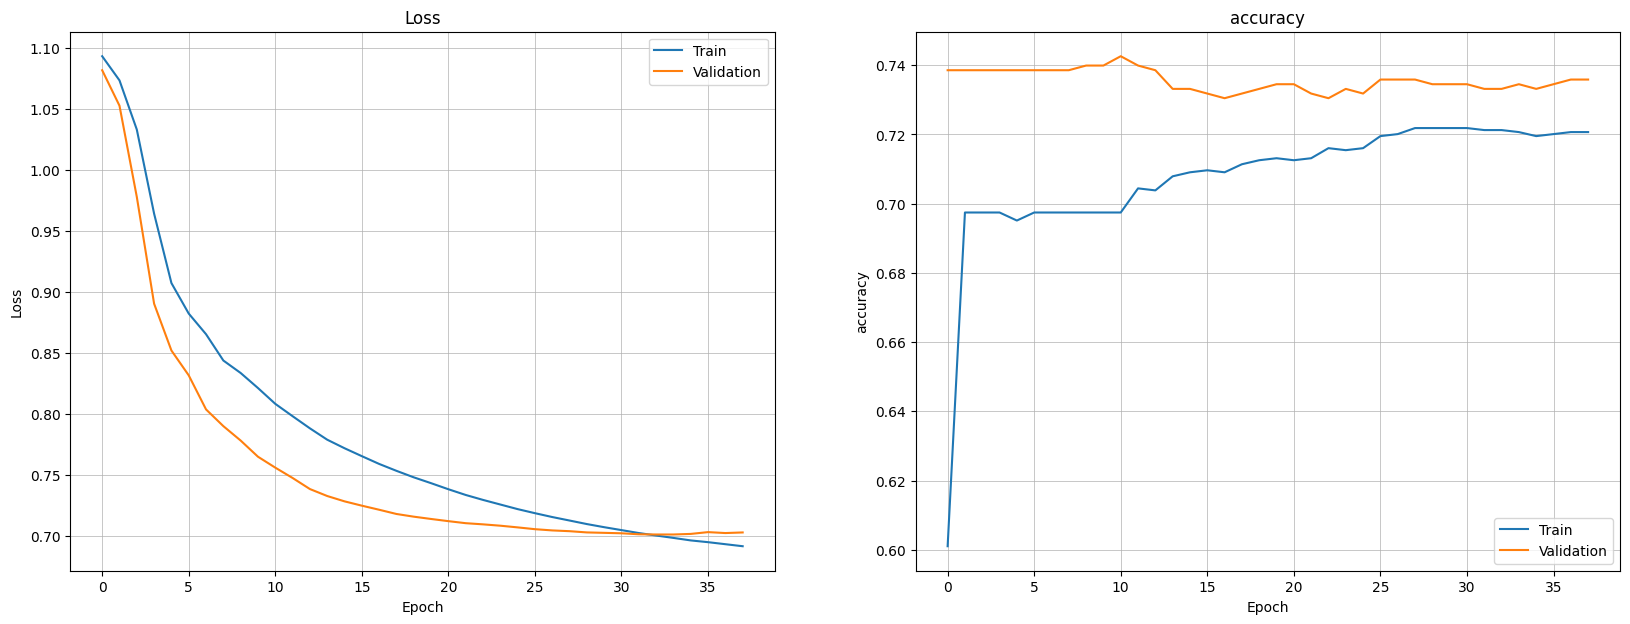

5/5 [==============================] - 0s 5ms/step - loss: 0.8265 - accuracy: 0.7400
✅ Model evaluated: loss 0.83 accuracy 0.74


Accuracy baseline fold n°1 = 0.54
Accuracy LSTM fold n°1 = 0.74
🏋🏽‍♂️ Improvement/Decrease vs. Baseline: 37.79 % 

Fold n°2
Split-set shape:
X: (352, 7, 10), y: (352, 7)
Split-set shape:
X: (150, 7, 10), y: (150, 7)
--------------------------------------------------
fit_model executed in 48.8 seconds, using up to 19.38MB of RAM


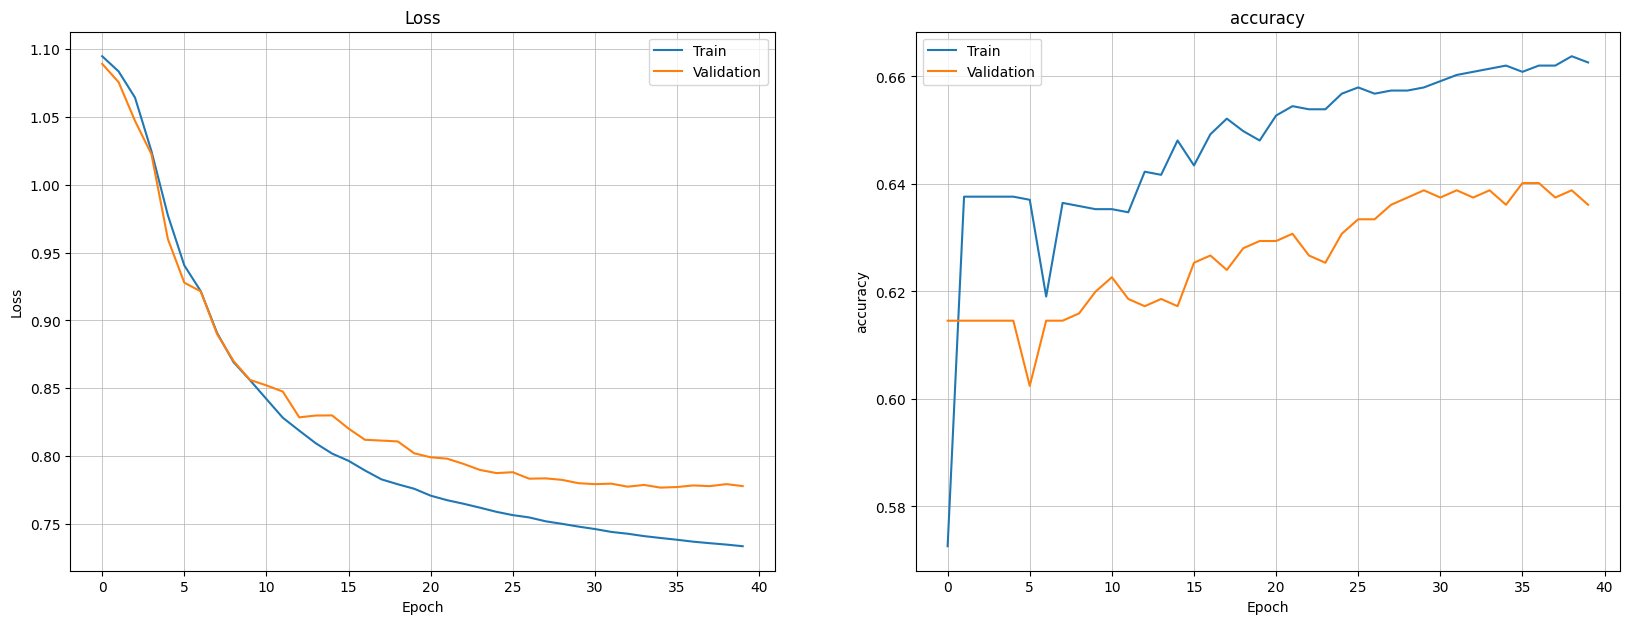

5/5 [==============================] - 0s 6ms/step - loss: 1.1091 - accuracy: 0.3705
✅ Model evaluated: loss 1.11 accuracy 0.37


Accuracy baseline fold n°2 = 0.54
Accuracy LSTM fold n°2 = 0.37
🏋🏽‍♂️ Improvement/Decrease vs. Baseline: -31.02 % 

Fold n°3
Split-set shape:
X: (352, 7, 10), y: (352, 7)
Split-set shape:
X: (150, 7, 10), y: (150, 7)
--------------------------------------------------
fit_model executed in 46.59 seconds, using up to 19.43MB of RAM


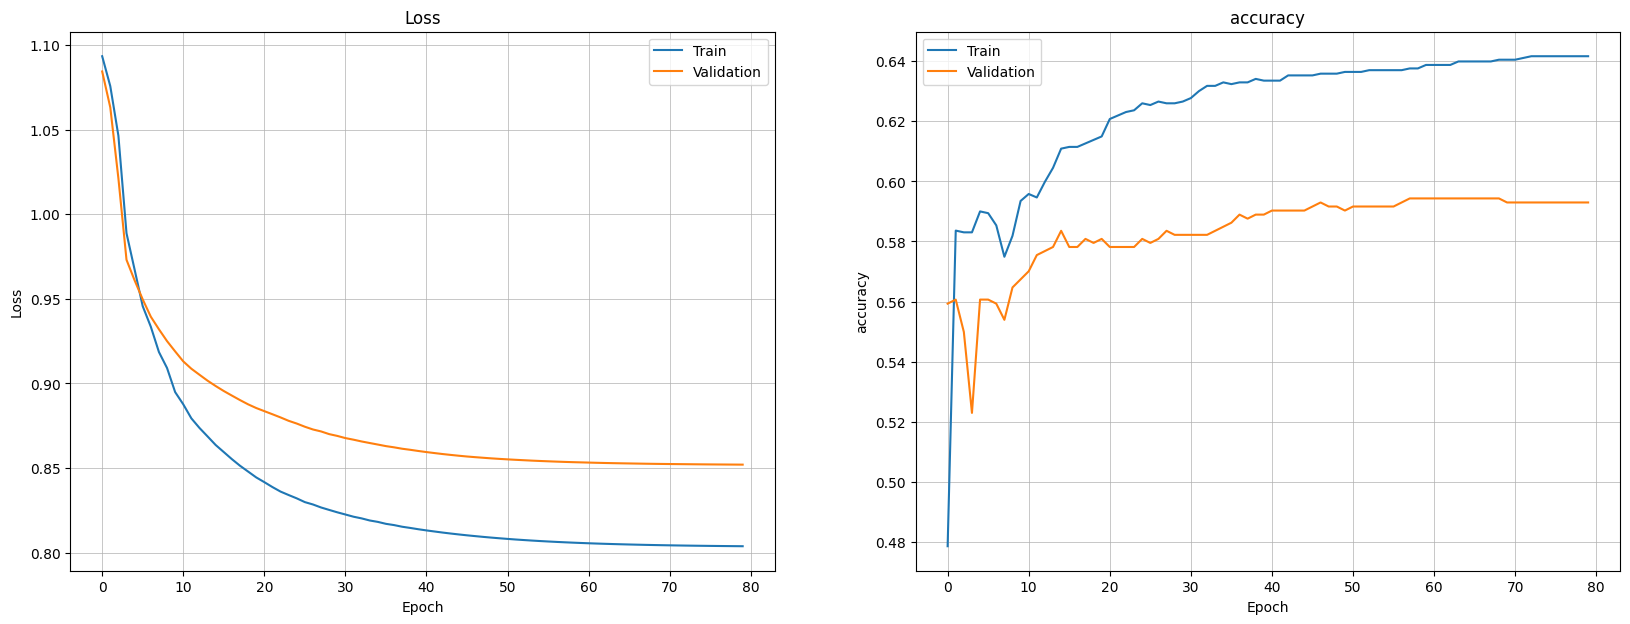

5/5 [==============================] - 0s 4ms/step - loss: 1.3095 - accuracy: 0.4505
✅ Model evaluated: loss 1.31 accuracy 0.45


Accuracy baseline fold n°3 = 0.54
Accuracy LSTM fold n°3 = 0.45
🏋🏽‍♂️ Improvement/Decrease vs. Baseline: -16.12 % 

Fold n°4
Split-set shape:
X: (352, 7, 10), y: (352, 7)
Split-set shape:
X: (150, 7, 10), y: (150, 7)
--------------------------------------------------
fit_model executed in 26.49 seconds, using up to 19.42MB of RAM


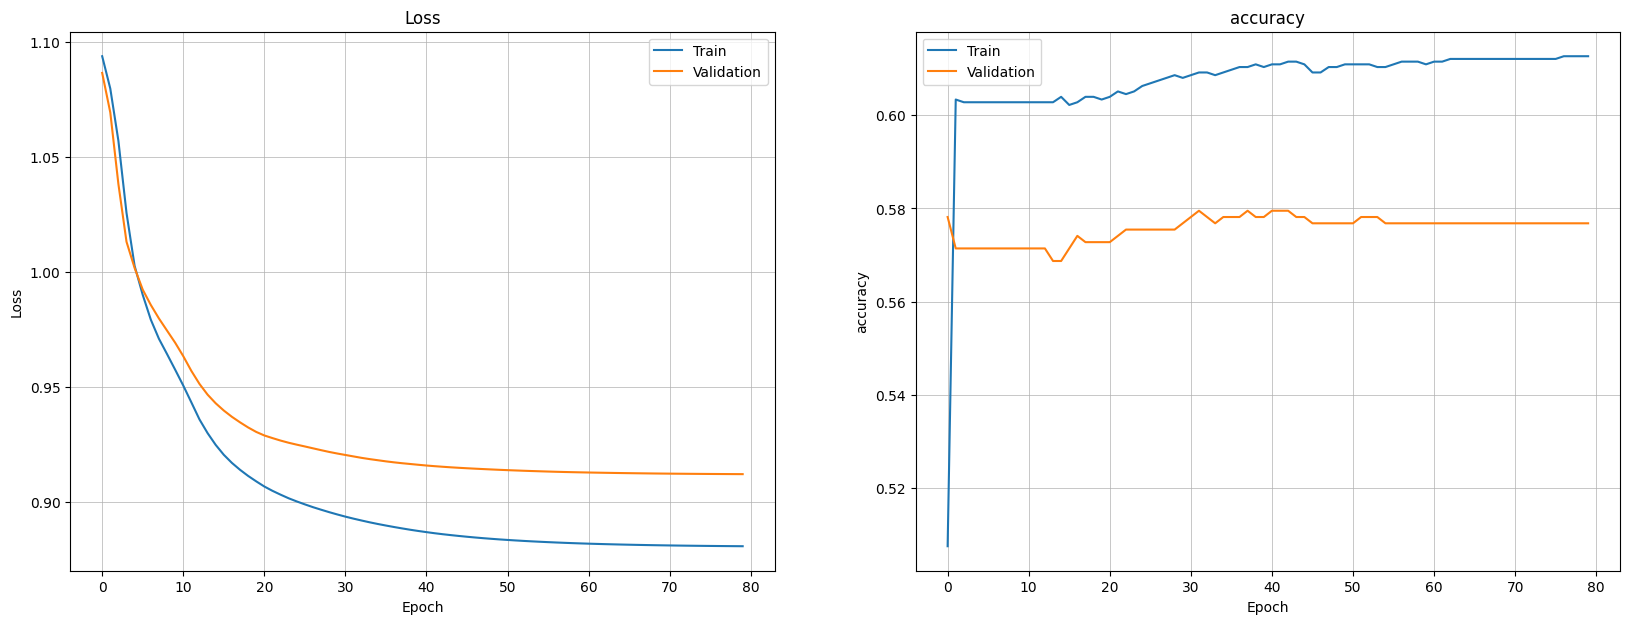

5/5 [==============================] - 0s 4ms/step - loss: 0.8889 - accuracy: 0.7571
✅ Model evaluated: loss 0.89 accuracy 0.76


Accuracy baseline fold n°4 = 0.54
Accuracy LSTM fold n°4 = 0.76
🏋🏽‍♂️ Improvement/Decrease vs. Baseline: 40.98 % 

Fold n°5
Split-set shape:
X: (352, 7, 10), y: (352, 7)
Split-set shape:
X: (150, 7, 10), y: (150, 7)
--------------------------------------------------
fit_model executed in 25.82 seconds, using up to 19.46MB of RAM


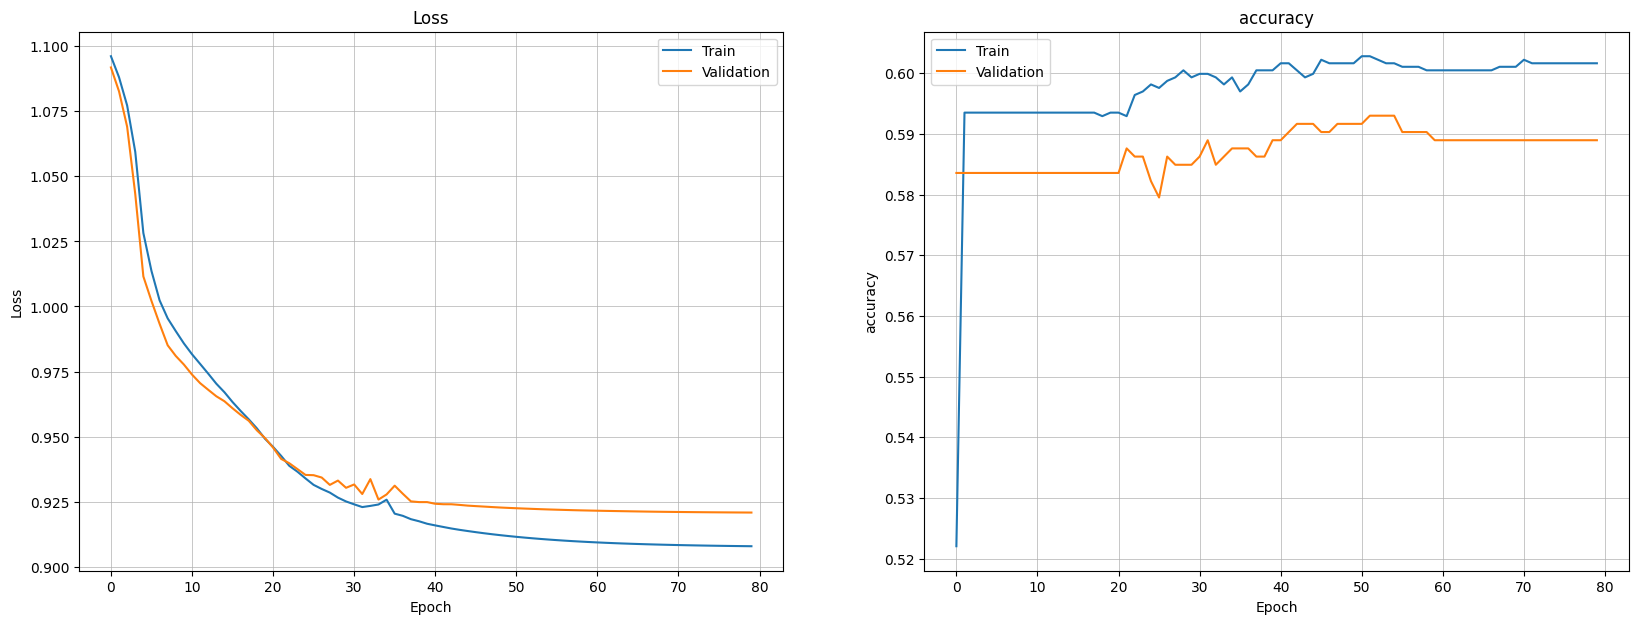

5/5 [==============================] - 0s 4ms/step - loss: 1.0231 - accuracy: 0.5352
✅ Model evaluated: loss 1.02 accuracy 0.54


Accuracy baseline fold n°5 = 0.54
Accuracy LSTM fold n°5 = 0.54
🏋🏽‍♂️ Improvement/Decrease vs. Baseline: -0.34 % 

Fold n°6
Split-set shape:
X: (352, 7, 10), y: (352, 7)
Split-set shape:
X: (150, 7, 10), y: (150, 7)
--------------------------------------------------
fit_model executed in 18.55 seconds, using up to 19.29MB of RAM


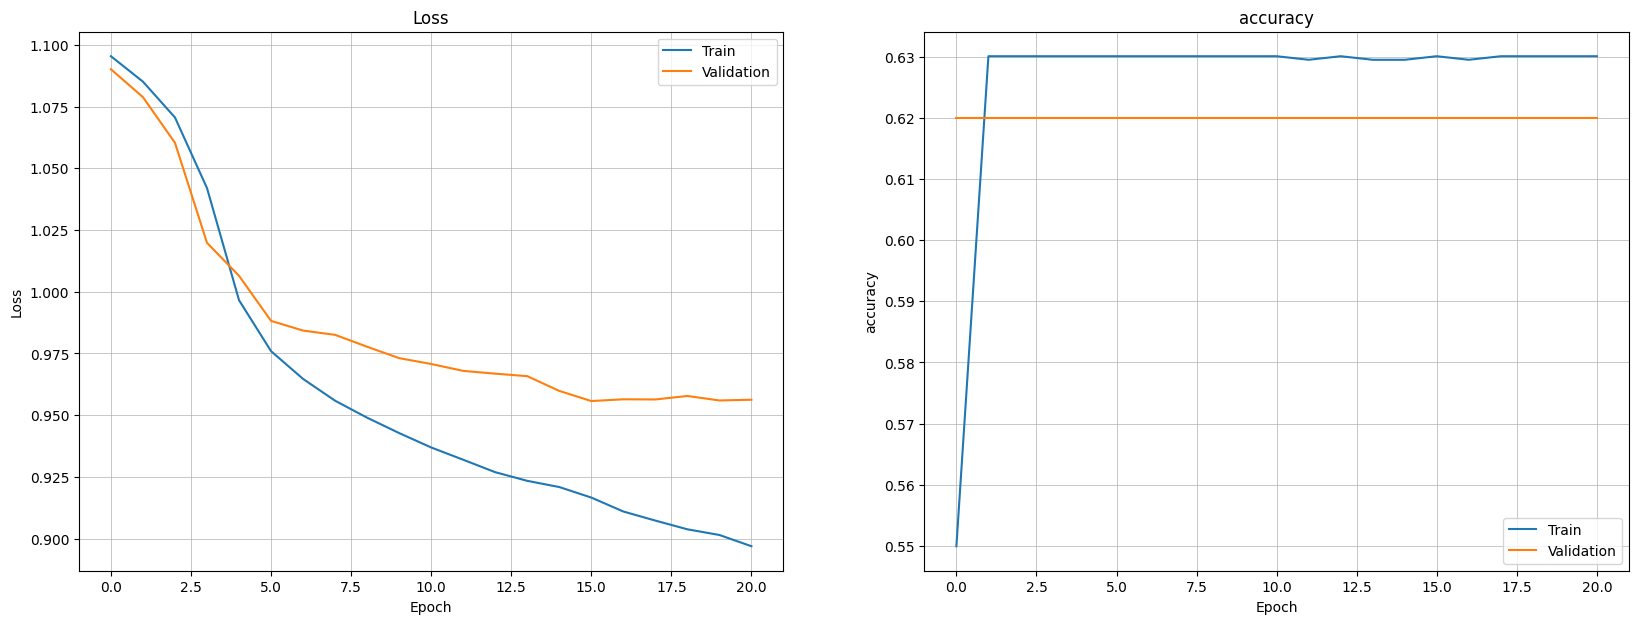

5/5 [==============================] - 0s 4ms/step - loss: 0.8885 - accuracy: 0.6362
✅ Model evaluated: loss 0.89 accuracy 0.64


Accuracy baseline fold n°6 = 0.54
Accuracy LSTM fold n°6 = 0.64
🏋🏽‍♂️ Improvement/Decrease vs. Baseline: 18.46 % 

Fold n°7
Split-set shape:
X: (352, 7, 10), y: (352, 7)
Split-set shape:
X: (150, 7, 10), y: (150, 7)
--------------------------------------------------
fit_model executed in 25.38 seconds, using up to 19.4MB of RAM


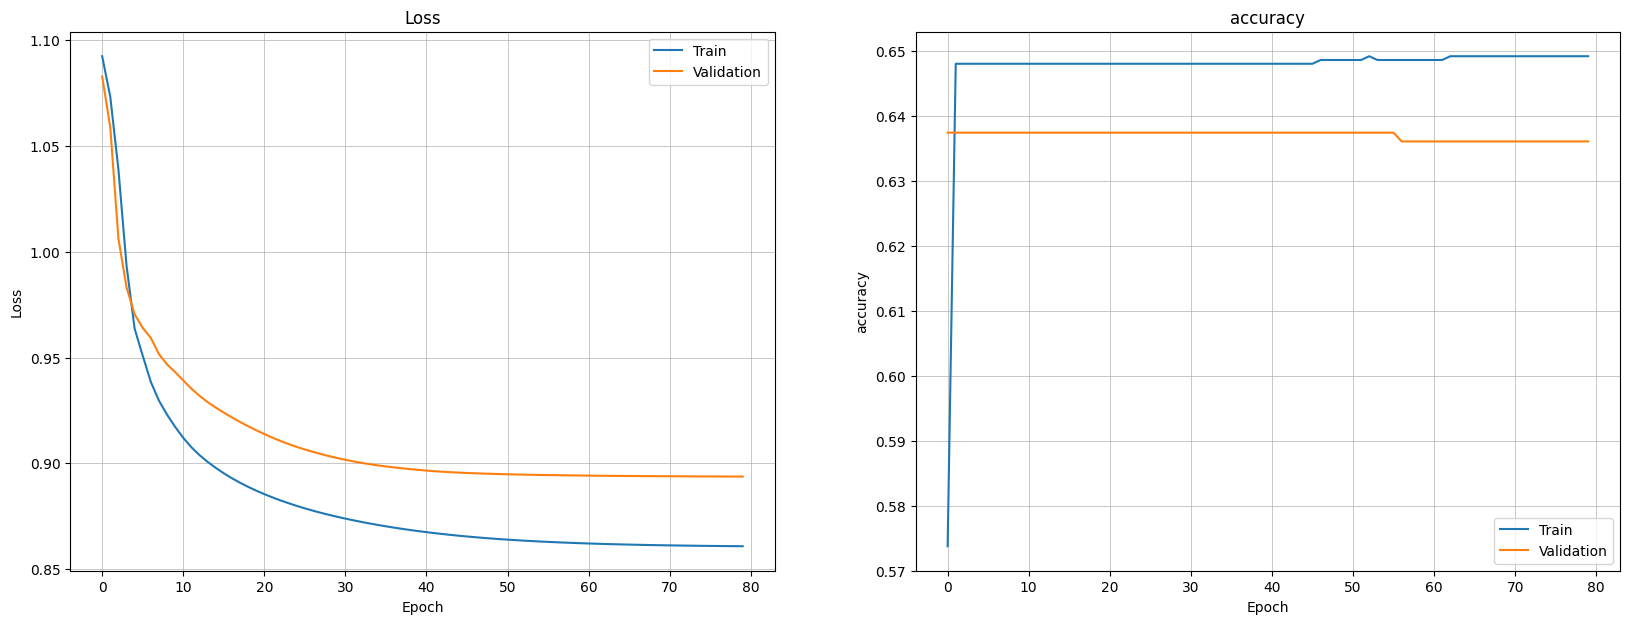

5/5 [==============================] - 0s 4ms/step - loss: 1.0226 - accuracy: 0.6076
✅ Model evaluated: loss 1.02 accuracy 0.61


Accuracy baseline fold n°7 = 0.54
Accuracy LSTM fold n°7 = 0.61
🏋🏽‍♂️ Improvement/Decrease vs. Baseline: 13.14 % 

Result for all folds
Average accuracy baseline = 0.54
Average accuracy LSTM = 0.59
🏋🏽‍♂️ Improvement/Decrease vs. Baseline: 8.98 % 



In [5]:
cross_validate(df)

# Model training

In [6]:
from workflow.params import FOLD_LENGTH, FOLD_STRIDE, STRIDE, TRAIN_TEST_RATIO, N_FEATURES, INPUT_LENGTH, TARGET, TARGET_COLUMN_IDX, N_TARGETS, OUTPUT_LENGTH, HORIZON

In [7]:
(df_train, df_test) = train_test_split(fold = df,
                                        train_test_ratio = TRAIN_TEST_RATIO,
                                        input_length = INPUT_LENGTH,
                                        horizon = HORIZON)

In [8]:
X_train, y_train = get_X_y(fold = df_train,
                        horizon = HORIZON,
                        input_length = INPUT_LENGTH,
                        output_length = OUTPUT_LENGTH,
                        stride = STRIDE)

X_test, y_test = get_X_y(df_test,
                        horizon = HORIZON,
                        input_length = INPUT_LENGTH,
                        output_length = OUTPUT_LENGTH,
                        stride = STRIDE)

Split-set shape:
X: (1229, 7, 11), y: (1229, 7)
Split-set shape:
X: (527, 7, 11), y: (527, 7)


In [9]:
model = init_model(X_train, y_train)
compile_model(model)
model, history = fit_model(model, X_train, y_train)

fit_model executed in 17.82 seconds, using up to 19.25MB of RAM


In [10]:
res = evaluate_model(model, X_test, y_test)
res

17/17 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.1076
✅ Model evaluated: loss nan accuracy 0.11


[nan, 0.10761724412441254]

# Prediction

In [11]:
y_true = df['ATMO']
y_pred = predict(model, X_test)

17/17 [==============================] - 1s 4ms/step


In [12]:
y_true[-7:-1]

Date_time
2022-11-07    0
2022-11-08    0
2022-11-09    1
2022-11-10    1
2022-11-11    0
2022-11-12    0
Name: ATMO, dtype: int64

In [13]:
y_pred

array([[[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       ...,

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]]

In [14]:
y_pred[-1]

array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32)

# Confusion matrix (to finish)

In [15]:
# results_df = pd.DataFrame({"actual": y_true,
#                            "predicted": y_pred})

# confusion_matrix = pd.crosstab(index= results_df['actual'],
#                                columns = results_df['predicted'])

In [16]:
# #Create a Confusion Matrix heatmap from the above data
# import seaborn as sns
# sns.heatmap(cm, annot=True, linewidths = 0.01)